In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd 
import numpy as np

In [2]:
profdf = pd.read_csv('./data/Washingtondata.csv')
plotdf = profdf[['Position','2014','2015','2016', 'First',
                    'hindex','CitationsAll','Citations13',
                    'hindex13']].copy()
plotdf = plotdf.dropna(axis=0,subset=['hindex'])

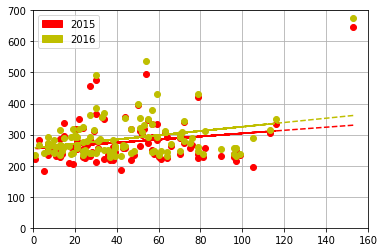

In [3]:
def plot_withline(x,y,cl1):
    fit = np.polyfit(x,y,1)
    fit_fn = np.poly1d(fit) 
    plt.plot(x,y/1000, cl1+'o', x, fit_fn(x)/1000, '--'+cl1)
    plt.xlim(0, 160)
    plt.ylim(0, 700)

    

x2015 = [i for i in plotdf['2015']>180000]
plot_withline(plotdf['hindex'][x2015],plotdf['2015'][x2015],'r')
plot_withline(plotdf['hindex'],plotdf['2016'],'y')
red_patch = mpatches.Patch(color='r', label='2015')
yellow_patch = mpatches.Patch(color='y', label='2016')
plt.legend(handles=[red_patch,yellow_patch])
plt.grid()
plt.show()


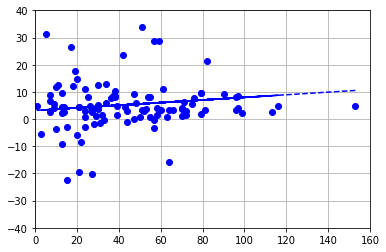

In [4]:
plotdf['Increase'] = 100*(plotdf['2016'][x2015]-plotdf['2015'][x2015])/plotdf['2015'][x2015]
plot_withline(plotdf['hindex'][x2015],1000*plotdf['Increase'][x2015],'b')
plt.ylim(-40, 40)
plt.grid()
plt.show()